## Hypothesis tests

We've got a sample of students (our survey). 

We will run the hypothesis test to check whether the mean in the population of students (the process "generating" students) equals 179 cm. 

179 cm benchmark is taken from the centile grid for Warsaw boys: https://adst.mp.pl/img/articles/prawidlowyrozwoj/wzrost_ch_max.jpg



$$H_0: \mu = 179$$

$$H_A: \mu \ne 179$$


Null hypothesis is the hypothesis we reject or fail to reject in a hypothesis test. In this case we verify $\mu = 179$. 

In [1]:
import pandas as pd

csv_url = "https://docs.google.com/spreadsheets/d/1H6b5mkq68MeRQyP0Cr2weCpVkzmpR0c2Oi7p147o2a0/export?format=csv"

# Read the sheet into a DataFrame
d = pd.read_csv(csv_url)

print(d.head())

   height  handedness  right_hand_span  left_hand_span  head_circ eye_colour  \
0     159        0.88             19.0            19.0       54.0       Blue   
1     160       -1.00             19.0            20.0       57.0      Green   
2     161        0.79             17.0            16.5       57.0      hazel   
3     162        0.79             16.0            16.0       57.0       gray   
4     162        0.79             16.0            16.0       54.0      Brown   

   gender  siblings  movies  soda   bedtime       fb_freq  fb_friends  \
0  Female         2     3.0   7.0  02:00:00    once a day       135.0   
1  Female         2     0.5   2.0  04:30:00             0         1.0   
2  Female         3     3.0   2.0  23:50:00   once a week       354.0   
3  Female         2     0.0   2.0  23:10:00  almost never       192.0   
4  Female         2     1.0   3.0  00:00:00         never         1.0   

                  stat_likert  
0  Neither agree nor disagree  
1              S

In [3]:
# Our data is height of males in the sample
data = d['height'][d['gender']=="Male"]
print(data)

13    167
15    168
18    170
20    170
23    173
25    173
26    173
27    174
29    176
30    176
31    176
34    178
35    179
36    179
37    180
38    180
40    180
41    182
42    183
43    183
44    184
45    184
46    185
47    185
48    186
49    186
50    188
51    189
52    189
53    190
54    190
55    190
56    191
57    191
58    195
59    206
Name: height, dtype: int64


In [4]:
import numpy as np
np.mean(data)

np.float64(181.91666666666666)

https://bookdown.org/blazej_kochanski/statistics2/templates-main.html

In [6]:
import scipy.stats as stats

test_result = stats.ttest_1samp(data, popmean=179, alternative='two-sided')

print(test_result)

TtestResult(statistic=np.float64(2.086228658423341), pvalue=np.float64(0.04431130919883513), df=np.int64(35))


I every hypothesis test there is:

1) a null hypothesis

2) an alternative hypothesis

3) a test statistic

4) a p-value

## How does randomness look like -- experiment

Your job is to imagine 100 tosses of the coin, one after another. One side is "O", another "R" (Orzel/Reszka; Head/Tail) etc. Put them on paper, using a pen. Without computers or real coins/other random number generators. 

Put them in sequence, ten tosses in a line, ten lines. The generated tosses should resemble real random tosses. The person, whose tosses are most similar to typical real random tosses wins. 


First toss: "O" - 26 students, "R" - 10 students. 

In [8]:
from scipy.stats import binomtest

result = binomtest(k=26, n=36)
print(result)

BinomTestResult(k=26, n=36, alternative='two-sided', statistic=0.7222222222222222, pvalue=0.011330984183587134)


Pepsi/Coke test from the blog post:
https://blazejkochanski.pl/post/cola/

In [7]:
from scipy.stats import binomtest

result = binomtest(k=11, n=13, alternative='greater')
print(result)

BinomTestResult(k=11, n=13, alternative='greater', statistic=0.8461538461538461, pvalue=0.01123046875)


Let's test correlation between head size and height for Females. 

In [15]:
mask = (d['gender']=="Female") & (d['head_circ'].notna()) & (d['height'].notna())

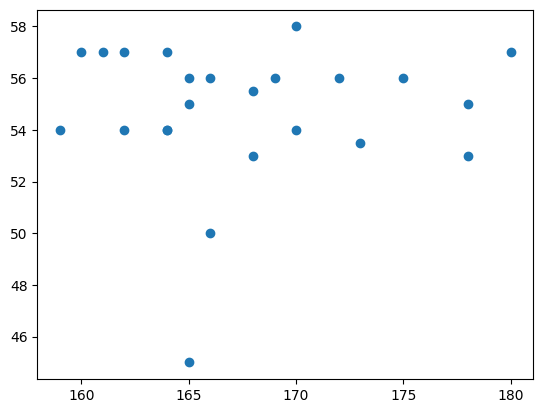

In [20]:
x = d['height'][mask]
y = d['head_circ'][mask]

import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(x, y)
plt.show()

In [23]:
print(x.corr(y))
print(stats.pearsonr(x,y))

0.04923828678795192
PearsonRResult(statistic=np.float64(0.04923828678795198), pvalue=np.float64(0.8192742771663436))


In the correlation test, by default:

$$ H_0: \rho = 0 $$

$$ H_A: \rho \ne 0 $$

p-value ~= 0.82, so we do not reject the null hypothesis. The obtained result (correlation coefficient in the sample ~= 0.05) is not statistically significant. 

Cramer's V example from the previous meeting:

In [25]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
d['eye2'] = "Other"
d.loc[d['eye_colour']=="Brown", 'eye2'] = "Brown"
d.loc[d['eye_colour']=="Blue", 'eye2'] = "Blue"
d.loc[d['eye_colour']=="Green", 'eye2'] = "Green"
print(pd.crosstab(d['eye2'], d['gender']))
def cramers_v(x, y):
    """
    Compute Cramér's V statistic for categorical-categorical association.

    Parameters:
        x (pd.Series): Categorical variable.
        y (pd.Series): Categorical variable.

    Returns:
        float: Cramér's V value between 0 and 1.
    """
    # Create a contingency table
    cont_table = pd.crosstab(x, y)

    # Compute chi-squared statistic
    chi2 = chi2_contingency(cont_table)[0]

    # Get sample size and minimum dimension
    n = cont_table.sum().sum()
    k = min(cont_table.shape) - 1

    # Compute Cramér's V
    v = np.sqrt(chi2 / (n * k))
    return v

print("Cramer's V correlation coefficient: ")
print(cramers_v(d['eye2'], d['gender']))

gender  Female  Male
eye2                
Blue         8    13
Brown        9    11
Green        3     9
Other        4     3
Cramer's V correlation coefficient: 
0.19245008972987526


Is the result statistically significant? 

$$ H_0: \text{Two variables (gender and eye colour) are independent} $$

$$ H_A: \text{Two variables (gender and eye colour) are dependent} $$

Chi-squared ($\chi^2$) test 

In [34]:
import numpy as np
import scipy.stats as stats
tab = pd.crosstab(d['eye2'], d['gender'])
print(tab)
stats.chi2_contingency(np.array(tab))

gender  Female  Male
eye2                
Blue         8    13
Brown        9    11
Green        3     9
Other        4     3


Chi2ContingencyResult(statistic=np.float64(2.2222222222222223), pvalue=np.float64(0.5275845603917897), dof=3, expected_freq=array([[ 8.4, 12.6],
       [ 8. , 12. ],
       [ 4.8,  7.2],
       [ 2.8,  4.2]]))

p-value is not low (0.52) => if $H_0$ is true, it is quite probable that we obtain such results in the sample (Cramer's V >= 0.19). We fail to reject $H_0$ (which says that eye colour and gender are independent). 

In [35]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -- ------------------------------------- 0.2/3.0 MB 3.3 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 MB 10.9 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 24.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import yfinance as yf

data = yf.download(["AAPL", "MSFT", "GOOG", "KO", "^GSPC"], start="2019-12-31", end="2025-11-01")
print(data["Close"]["KO"].head())


C:\Users\lab821-17\AppData\Local\Temp\1\ipykernel_1020\2623553211.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(["AAPL", "MSFT", "GOOG", "KO", "^GSPC"], start="2019-12-31", end="2025-11-01")
[*********************100%***********************]  5 of 5 completed

Date
2019-12-31    46.367992
2020-01-02    46.066406
2020-01-03    45.815098
2020-01-06    45.798332
2020-01-07    45.446491
Name: KO, dtype: float64


In [37]:
data2 = yf.download(["KO"], start="2019-12-31", end="2025-11-01"
print(data2)

C:\Users\lab821-17\AppData\Local\Temp\1\ipykernel_1020\1441236896.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download(["KO"], start="2019-12-31", end="2025-11-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker             KO         KO         KO         KO        KO
Date                                                            
2019-12-31  46.367992  46.393126  46.058036  46.242336   7982600
2020-01-02  46.066406  46.435003  45.873727  46.342853  11867700
2020-01-03  45.815098  46.066417  45.312465  45.505141  11354500
2020-01-06  45.798332  45.999387  45.672676  45.781581  14698300
2020-01-07  45.446491  45.739693  45.362720  45.614037   9973900
...               ...        ...        ...        ...       ...
2025-10-27  70.059998  70.120003  69.250000  69.779999  13800000
2025-10-28  70.160004  70.900002  69.949997  70.050003  12730500
2025-10-29  68.349998  70.029999  68.160004  69.919998  19789600
2025-10-30  68.980003  69.290001  68.389999  68.449997  14751700
2025-10-31  68.900002  69.070000  67.900002  68.550003  16742700

[1468 rows x 5 columns]


In [49]:
y = data['Close']['KO'].resample("M").ffill().pct_change().dropna()
x = data['Close']['^GSPC'].resample("M").ffill().pct_change().dropna()

C:\Users\lab821-17\AppData\Local\Temp\1\ipykernel_1020\2821213359.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = data['Close']['KO'].resample("M").ffill().pct_change().dropna()
C:\Users\lab821-17\AppData\Local\Temp\1\ipykernel_1020\2821213359.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x = data['Close']['^GSPC'].resample("M").ffill().pct_change().dropna()


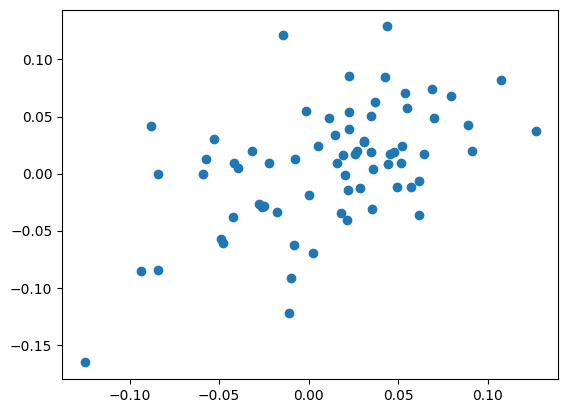

PearsonRResult(statistic=np.float64(0.5128616632999645), pvalue=np.float64(5.642723034815252e-06))

In [51]:
plt.scatter(x, y)
plt.show()
stats.pearsonr(x,y)